In [8]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.tsa.stattools as ts
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


In [20]:
#셀트리온
df = pd.read_csv('C:/Users/dlwjd/school/datamining/sinpung_day.csv')

#set index to datetime
df['Date'] = pd.to_datetime(df['Date'])
#df['Date'] -= pd.Timedelta(weeks=1)   # 주식 주봉처럼 시작날로 보정
df.set_index(df['Date'], inplace=True)
df = df.drop('Date', 1)

#주가
start_date = '2017-07-03'
end_date = '2020-11-30'
#삼성 : 005930  셀트리온 : 068270  신풍 : 019170
stock_week = pdr.get_data_yahoo('019170.ks', start_date, end_date, interval='d')
#변동성
stock_week['Volatility'] = ((stock_week['High'] - stock_week['Low']) / stock_week['Low'])*100
stock_week = stock_week.loc[:,['Volume', 'Close','Volatility']]


#증감률
df = pd.concat([df, stock_week], axis=1)
df.columns = ['글 수', '거래량', '가격', '가격 변동성']
df['post_ma20'] = df['글 수'].rolling(20).mean()
df['volume_ma20'] = df['거래량'].rolling(20).mean()
df['vo_ma20'] = df['가격 변동성'].rolling(20).mean()
df.index = df.index.rename('날짜(일)')
df=df.iloc[21:]
display(df.head())

,글 수,거래량,가격,가격 변동성,volume_ma20,vo_ma20
날짜(일),,,,,,
2017-07-24,2,50097.0,6170.0,2.272727,NaN,NaN
2017-07-25,2,98117.0,6080.0,1.976936,NaN,NaN
2017-07-26,3,64824.0,6040.0,1.990050,NaN,NaN
2017-07-27,10,63550.0,5980.0,3.209459,NaN,NaN
2017-07-28,5,111312.0,5820.0,3.799655,NaN,NaN


C:\Users\dlwjd\Anaconda3\envs\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dlwjd\Anaconda3\envs\python37\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


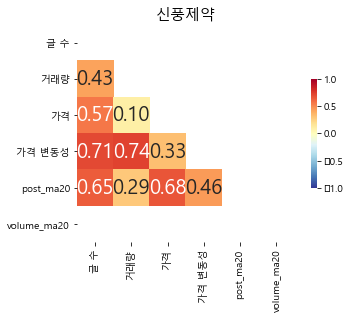

In [16]:
#상관분석

corr=df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cor_heatmap = sns.heatmap(corr, cbar = True, annot = True, mask=mask,annot_kws={'size' : 20}, 
                         fmt = '.2f', square = True, cbar_kws={"shrink": .5}, cmap = 'RdYlBu_r',
                         vmin = -1.0,vmax = 1)

plt.title('신풍제약', fontsize=15)
plt.show()

In [11]:
#공적분
score, pvalue, _ = ts.coint(df['글 수'],df['가격 변동성'])
print('Cointegration test p-value: ' + str(pvalue))
score, pvalue, _ = ts.coint(df['거래량'],df['가격 변동성'])
print('Cointegration test p-value: ' + str(pvalue))

granger_test_result = ts.grangercausalitytests(df[['글 수',
                                                '가격 변동성']].values,maxlag=2)
granger_test_result = ts.grangercausalitytests(df[['거래량',
                                                '가격 변동성']].values,maxlag=2)
                                                                                 

MissingDataError: exog contains inf or nans